In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [521]:
import numpy as np
import pandas as pd
from scipy.signal import coherence
from scipy.signal import periodogram
from scipy.signal import csd
import matplotlib.pyplot as plt

In [140]:
def repeat_codon(x, times):
    ans = []
    for i in range(0, len(x), 3):
        ans += (x[i:i+3] * times)
    return ans

In [338]:
#x = np.array([1,0,0,1,0,1,1,0,0.5,1,1,0,1,0,0,1,0,0])
#x = repeat_codon(x, 10)
#x = np.array([1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0]*100 + [0,0,0] * 1000)
#x = np.array([3,0,0,4,0,0,2,0,0,5,0,0,1,0,0,1,0,0])
#x  = np.array([1, 0, 0,1,0,1,2,0,1,1,1,0,1,0,0,1,0,0])
x = np.array(x)
#x = np.array([3,3,3,1,0,0])
y = np.array([0,1,0] * (len(x) // 3))
#x = np.array([1,1/100,2/100,1,3/400,6/400,1,2/500,3/500,1,0,0,1,0,0,1,0,0])

In [339]:
f, Cxy = coherence(x, y, nperseg=3, noverlap=0)

In [340]:
f

array([ 0.        ,  0.33333333])

In [341]:
Cxy

array([ 0.17832681,  0.08118944])

In [253]:
x

array([1, 0, 0, ..., 3, 0, 0])

In [146]:
np.array(1/2)

array(0)

In [334]:
s='0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 3 2 0 0 0 0 1 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0        0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 3 0 0        0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0'

In [335]:
x = [int(i) for i in s.strip().split()]

In [336]:
len(x)

220

In [337]:
len([i for i in x if i])

34

33

In [326]:
ans = []
for i in range(0, len(x), 3):
    if i+2 >= len(x):
        break
    if x[i]==x[i+1]==x[i+2]==0:
        continue
    ans += [x[i], x[i+1], x[i+2]]

In [328]:
len(ans)

90

In [474]:
def repeat_codon(x, times):
    ans = []
    for i in range(0, len(x), 3):
        ans += (x[i:i+3] * times)
    return ans

In [514]:
s='0 2 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 2 0 4 0 0 0 1 1 0 1 0 0 0 1 2 0 0 0 0 0 0 0 0 1 1 0 1 0        0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 4 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0        0 0 0 0 0 0 1 1 0 0 0 0 1 1 2 0 0 0 0 0 1 0 2 0 0 0'

In [517]:
x = np.array([int(i) for i in s.strip().split()])
f1 = sum(x[0::3])
f2 = sum(x[1::3])
f3 = sum(x[2::3])
x = x[2:]
i = 0
normalized = []
while i + 2 < len(x):
    if x[i] == x[i+1] == x[i+2] == 0:
        i += 3
        continue
    #normalized += [x[i], x[i+1], x[i+2]]
    if x[i] == 0:
        normalized += [x[i], x[i+1], x[i+2]]
    else:
        normalized += [1.0, x[i+1]/x[i], x[i+2]/x[i]]
    i += 3
print(normalized)
normalized = repeat_codon(normalized, 10)
#normalized = normalized * 10000
length = len(normalized) // 3 * 3
normalized = normalized[:length]
print(len(normalized))
y = [1, 0, 0] * (len(normalized) // 3)
f, Cxy = coherence(normalized, y, nperseg=30, noverlap=15)
Cxy[np.argwhere(np.isclose(f, 1 / 3.0))[0]][0]

[0, 1, 1, 1.0, 0, 0, 1.0, 1, 0, 0, 0, 1, 1.0, 0, 0, 1.0, 1, 0, 0, 1, 0, 1.0, 0, 2, 0, 4, 0, 0, 0, 1, 1.0, 0, 1, 1.0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1.0, 0, 0, 0, 1, 1, 0, 1, 0, 1.0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1.0, 0, 0, 0, 0, 1, 1.0, 2, 0, 0, 1, 0, 1.0, 0, 0]
900


0.11206814266802534

In [516]:
normalized

[0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 1,
 0,
 1.0,
 1,
 0,
 1.0,
 1,
 0,
 1.0,
 1,
 0,
 1.0,
 1,
 0,
 1.0,
 1,
 0,
 1.0,
 1,
 0,
 1.0,
 1,
 0,
 1.0,
 1,
 0,
 1.0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 1,
 0,
 1.0,
 1,
 0,
 1.0,
 1,
 0,
 1.0,
 1,
 0,
 1.0,
 1,
 0,
 1.0,
 1,
 0,
 1.0,
 1,
 0,
 1.0,
 1,
 0,
 1.0,
 1,
 0,
 1.0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1.0,
 0,
 2,
 1.0,
 0,
 2,
 1.0,
 0,
 2,
 1.0,
 0,
 2,
 1.0,
 0,
 2,
 1.0,
 0,


In [402]:
normalized

[0,
 1,
 0,
 0,
 0,
 1,
 1.0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 13,
 1.0,
 0,
 0,
 0,
 1,
 0,
 1.0,
 0,
 0,
 0,
 1,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 1,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 1,
 1.0,
 0,
 0,
 0,
 1,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 1,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 1,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 1.0,
 2,
 0,
 1.0,
 0,
 0,
 0,
 1,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 1,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 1,
 2,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 1.0,
 0,
 0]

In [364]:
Cxy

array([  7.74787405e-05,   7.58110474e-05,   3.32431886e-06,
         4.44041673e-07,   1.54938213e-06,   4.67574399e-06,
         2.49990473e-07,   3.89739611e-07,   5.85161985e-06,
         3.66134879e-01,   5.88008903e-01,   3.36396153e-01,
         6.05926928e-06,   3.88319747e-06,   2.40445457e-06,
         1.56844982e-06])

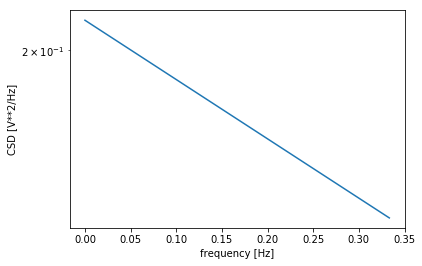

In [527]:
f, Pxy = csd(np.array([1,0,0]), np.array([1,0,0]),nperseg=3, noverlap=0)
plt.semilogy(f, np.abs(Pxy))
plt.xlabel('frequency [Hz]')
plt.ylabel('CSD [V**2/Hz]')
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
def simulate(N):
    #np.random.seed()
    theta = np.random.uniform(0, 2*np.pi, N)
    ave_cos = np.mean(np.cos(theta) ) 
    ave_sin = np.mean(np.sin(theta))
    return ave_cos ** 2 + ave_sin ** 2

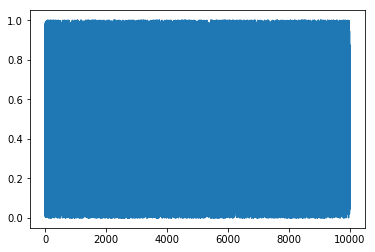

In [35]:
ans = []
N = 2
for i in range(10000):
    ans.append(simulate(N))
plt.plot(ans)

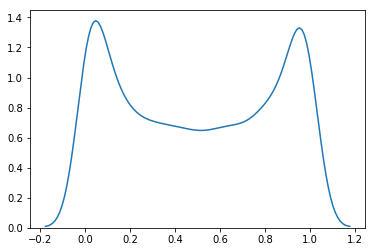

In [36]:
ax = sns.kdeplot(ans)